# QVC DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mn
%matplotlib inline

In [2]:
df1 = pd.read_csv('../Dataset/order_master.csv')
df1.head()

,ORDER_NBR,ORDER_LINE_NBR,CUSTOMER_NBR,PRODUCT_NBR,ORDER_PLATFORM,ORDER_DATE,ORDER_TIME,TOTAL_LINE_AMT
0,O150021637,1,151575901,P150028635,QVC.COM,2015-01-01,00:27:31,103.28
1,O150023737,1,151967484,P150028635,QVC.COM,2015-01-01,00:49:46,103.28
2,O157979478,1,153235967,P150028635,On Air,2015-01-01,00:20:21,103.28
3,O157979514,2,151376686,P150025286,On Air,2015-01-01,00:24:17,20.99
4,O150025459,1,152113883,P150048858,QVC.COM,2015-01-01,01:13:59,177.74


In [3]:
df1.index

RangeIndex(start=0, stop=4725771, step=1)

In [4]:
df1.dtypes

ORDER_NBR          object
ORDER_LINE_NBR      int64
CUSTOMER_NBR        int64
PRODUCT_NBR        object
ORDER_PLATFORM     object
ORDER_DATE         object
ORDER_TIME         object
TOTAL_LINE_AMT    float64
dtype: object

In [5]:
df1['ORDER_LINE_NBR'] = df1['ORDER_LINE_NBR'].astype('object')
df1['CUSTOMER_NBR'] = df1['CUSTOMER_NBR'].astype('object')
df1.dtypes

ORDER_NBR          object
ORDER_LINE_NBR     object
CUSTOMER_NBR       object
PRODUCT_NBR        object
ORDER_PLATFORM     object
ORDER_DATE         object
ORDER_TIME         object
TOTAL_LINE_AMT    float64
dtype: object

In [6]:
df1.describe(exclude=[np.float])

,ORDER_NBR,ORDER_LINE_NBR,CUSTOMER_NBR,PRODUCT_NBR,ORDER_PLATFORM,ORDER_DATE,ORDER_TIME
count,4725771,4725771,4725771,4725771,4725771,4725771,4725771
unique,2652678,24,749859,48782,6,91,86398
top,O151193611,1,153187841,P150062267,On Air,2015-03-11,21:24:07
freq,24,3915967,979,29943,2580680,117267,127


In [7]:
df1.describe()

,TOTAL_LINE_AMT
count,4.725771e+06
mean,7.229641e+01
std,1.027045e+02
min,0.000000e+00
25%,3.453000e+01
50%,4.835000e+01
75%,7.186000e+01
max,7.719840e+03


In [8]:
df1.isnull().sum()

ORDER_NBR         0
ORDER_LINE_NBR    0
CUSTOMER_NBR      0
PRODUCT_NBR       0
ORDER_PLATFORM    0
ORDER_DATE        0
ORDER_TIME        0
TOTAL_LINE_AMT    0
dtype: int64

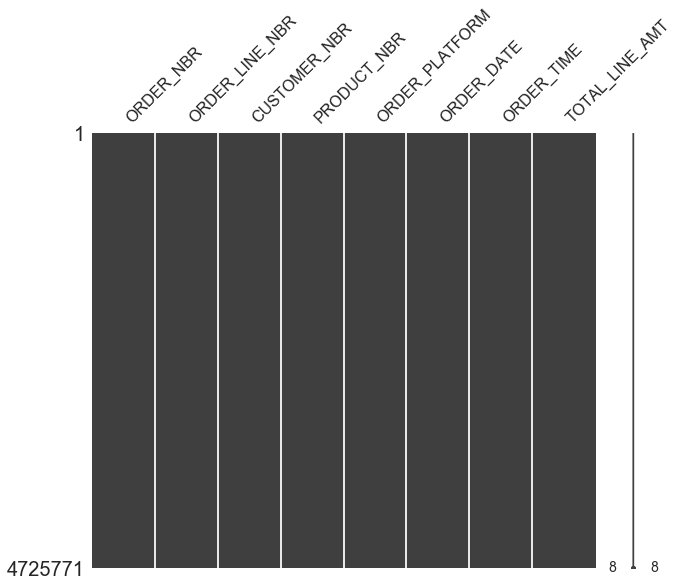

In [9]:
mn.matrix(df1, figsize=(10,8))

In [10]:
df2 = pd.read_csv('../Dataset/product_master.csv')
df2.head()

,PRODUCT_NBR,PRODUCT_DESCRIPTION,PRODUCT_CATEGORY,BRAND_NAME
0,P150028635,Fitbit Flex Wireless Activity and Sleep Tracker,Fun & Leisure,Fitbit
1,P150025286,SquareTrade 3-Yr Service Contract/Accidental,Fun & Leisure,SquareTrade
2,P150048858,Joan Rivers Crystal Pave' Orchid Brooch,Costume Jewelry,Joan Rivers
3,P150000250,Denim & Co. Original Waist Stretch Capri Pants,Apparel,Denim & Co.
4,P150018581,A-D philosophy no reason to hide duo,Health/Beauty,philosophy


In [11]:
df2.index

RangeIndex(start=0, stop=48780, step=1)

In [12]:
df2.dtypes

PRODUCT_NBR            object
PRODUCT_DESCRIPTION    object
PRODUCT_CATEGORY       object
BRAND_NAME             object
dtype: object

In [13]:
df2.describe()

,PRODUCT_NBR,PRODUCT_DESCRIPTION,PRODUCT_CATEGORY,BRAND_NAME
count,48780,48780,48780,45123
unique,48780,45420,19,1884
top,P150067167,SquareTrade 3-Yr Service Contract w/ADH: Electr,IQVC Divisional,Not Known
freq,1,20,14391,2710


In [14]:
df2.isnull().sum()

PRODUCT_NBR               0
PRODUCT_DESCRIPTION       0
PRODUCT_CATEGORY          0
BRAND_NAME             3657
dtype: int64

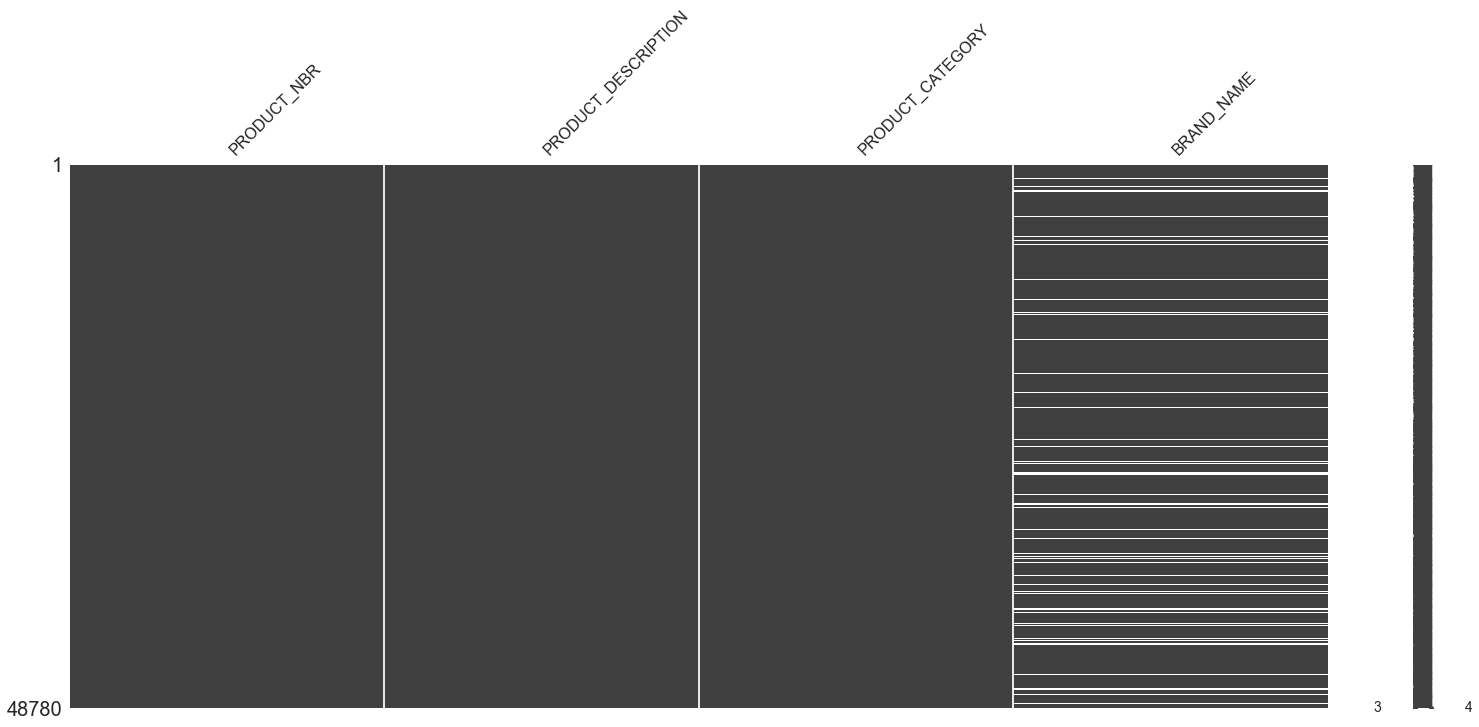

In [15]:
mn.matrix(df2)

In [16]:
df = pd.merge(df1,df2, on='PRODUCT_NBR',how='left')

In [17]:
df.describe(exclude=[np.float])

,ORDER_NBR,ORDER_LINE_NBR,CUSTOMER_NBR,PRODUCT_NBR,ORDER_PLATFORM,ORDER_DATE,ORDER_TIME,PRODUCT_DESCRIPTION,PRODUCT_CATEGORY,BRAND_NAME
count,4725771,4725771,4725771,4725771,4725771,4725771,4725771,4725769,4725769,4622839
unique,2652678,24,749859,48782,6,91,86398,45420,19,1884
top,O151193611,1,153187841,P150062267,On Air,2015-03-11,21:24:07,Lock & Lock 10pc Nestable Bowl and Zen Storage,Apparel,Not Known
freq,24,3915967,979,29943,2580680,117267,127,29943,1187908,642556


In [18]:
df.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            4725761, 4725762, 4725763, 4725764, 4725765, 4725766, 4725767,
            4725768, 4725769, 4725770],
           dtype='int64', length=4725771)

In [19]:
df.describe()

,TOTAL_LINE_AMT
count,4.725771e+06
mean,7.229641e+01
std,1.027045e+02
min,0.000000e+00
25%,3.453000e+01
50%,4.835000e+01
75%,7.186000e+01
max,7.719840e+03


In [20]:
df.isnull().sum()

ORDER_NBR                   0
ORDER_LINE_NBR              0
CUSTOMER_NBR                0
PRODUCT_NBR                 0
ORDER_PLATFORM              0
ORDER_DATE                  0
ORDER_TIME                  0
TOTAL_LINE_AMT              0
PRODUCT_DESCRIPTION         2
PRODUCT_CATEGORY            2
BRAND_NAME             102932
dtype: int64

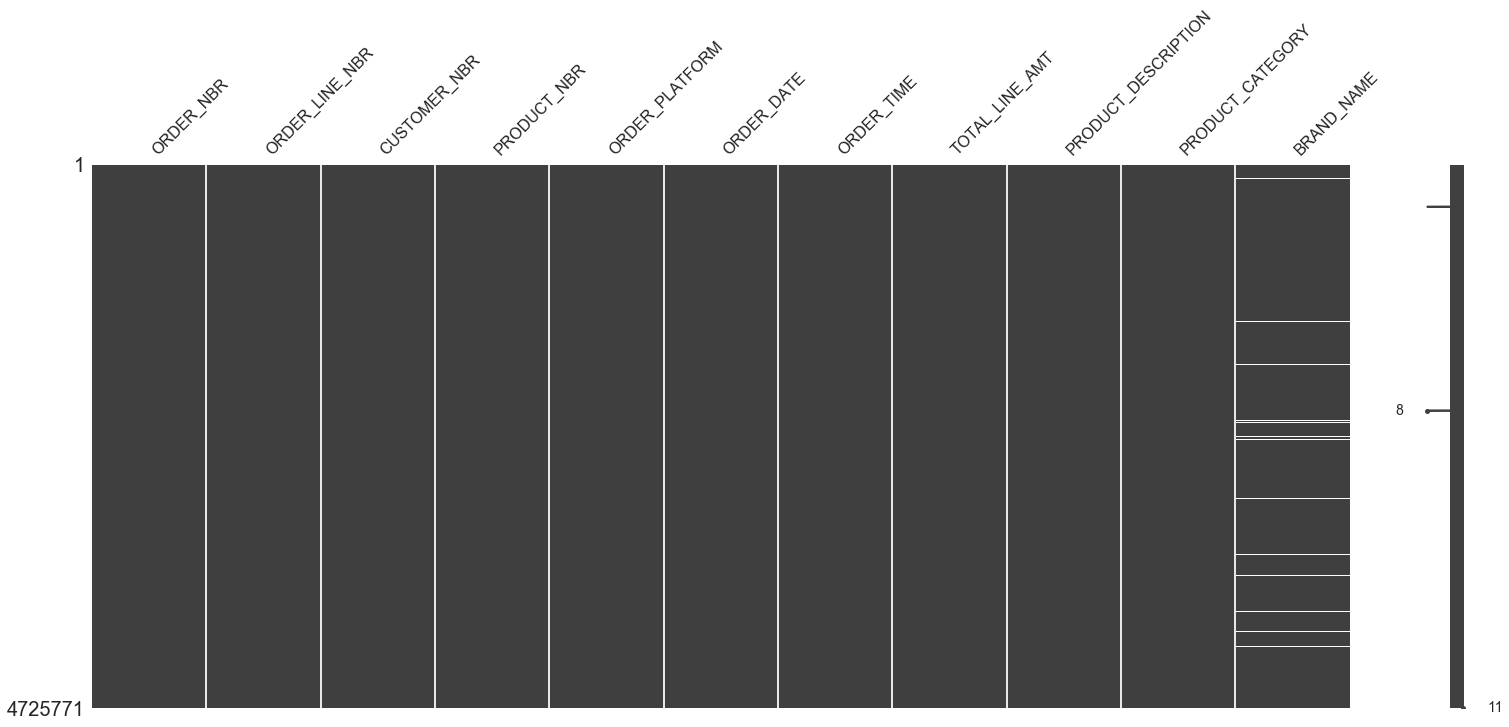

In [21]:
mn.matrix(df)

In [22]:
df = df.drop('BRAND_NAME', axis=1)


In [23]:
df.isnull().sum()

ORDER_NBR              0
ORDER_LINE_NBR         0
CUSTOMER_NBR           0
PRODUCT_NBR            0
ORDER_PLATFORM         0
ORDER_DATE             0
ORDER_TIME             0
TOTAL_LINE_AMT         0
PRODUCT_DESCRIPTION    2
PRODUCT_CATEGORY       2
dtype: int64

In [24]:
df.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            4725761, 4725762, 4725763, 4725764, 4725765, 4725766, 4725767,
            4725768, 4725769, 4725770],
           dtype='int64', length=4725771)

In [25]:
df = df.dropna()
df.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            4725761, 4725762, 4725763, 4725764, 4725765, 4725766, 4725767,
            4725768, 4725769, 4725770],
           dtype='int64', length=4725769)

In [26]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df['TOTAL_LINE_AMT'].groupby(df['PRODUCT_CATEGORY']).describe()

,count,mean,std,min,25%,50%,75%,max
PRODUCT_CATEGORY,,,,,,,,
Accessories,526321.00,77.66,63.50,0.00,41.36,60.04,81.60,763.68
App/Accss Event,25944.00,82.53,43.55,0.00,42.29,76.83,110.68,860.61
Apparel,1187908.00,46.93,19.31,0.00,35.04,45.53,55.28,706.85
Collectibles,5471.00,36.21,17.70,7.91,22.74,30.08,48.06,235.88
Costume Jewelry,33408.00,58.41,35.73,0.00,36.68,47.62,67.69,740.24
Electronics,97399.00,226.55,253.96,0.00,57.97,110.92,402.53,3271.08
Entertainment,10264.00,57.22,32.91,0.00,31.77,45.85,84.50,344.08
Fun & Leisure,72055.00,110.81,99.84,0.00,48.69,77.17,105.20,885.95
Gift Cards,1034.00,70.24,58.96,25.00,50.00,50.00,100.00,500.00


In [27]:
df['TOTAL_LINE_AMT'].groupby(df['PRODUCT_CATEGORY']).size()

PRODUCT_CATEGORY
Accessories         526321
App/Accss Event      25944
Apparel            1187908
Collectibles          5471
Costume Jewelry      33408
Electronics          97399
Entertainment        10264
Fun & Leisure        72055
Gift Cards            1034
Health               18715
Health/Beauty       800884
Home Decor         1097535
Housewares          261227
IQVC Divisional     113506
Jewelry             399825
License Hardgds       2754
PUBLIC RELATION         39
Returns               1035
Textile/Furnit       70445
Name: TOTAL_LINE_AMT, dtype: int64

In [28]:
df['TOTAL_LINE_AMT'].groupby(df['PRODUCT_CATEGORY']).agg(['sum'])

,sum
PRODUCT_CATEGORY,
Accessories,40874881.72
App/Accss Event,2141172.37
Apparel,55752760.84
Collectibles,198118.57
Costume Jewelry,1951304.87
Electronics,22065410.92
Entertainment,587296.57
Fun & Leisure,7984637.54
Gift Cards,72625.00


In [29]:
df['TOTAL_LINE_AMT'].groupby(df['PRODUCT_CATEGORY']).agg(['sum']).sort_values(by='sum',ascending=False)

,sum
PRODUCT_CATEGORY,
Home Decor,66670935.17
Health/Beauty,55827262.06
Apparel,55752760.84
Jewelry,41550911.06
Accessories,40874881.72
Electronics,22065410.92
Housewares,19962866.69
IQVC Divisional,14185603.81
Textile/Furnit,9346945.68


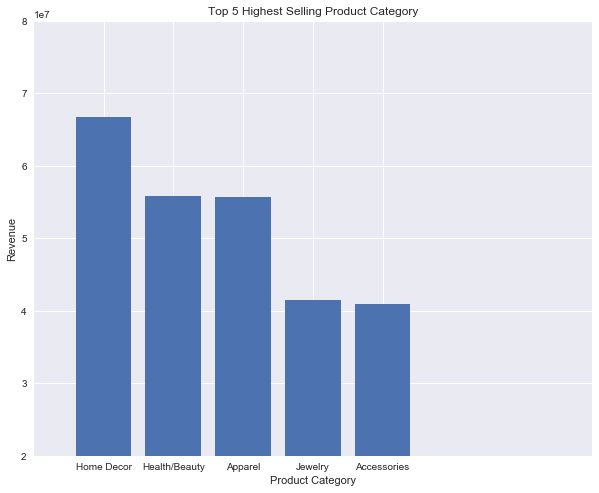

In [30]:
dft = df['TOTAL_LINE_AMT'].groupby(df['PRODUCT_CATEGORY']).agg(['sum']).sort_values(by='sum',ascending=False)

x_label = dft.index.tolist()
x_label = x_label[0:5]

x = [1,2,3,4,5]

y = dft.iloc[:,0:].values.tolist()
y = sum(y,[])
y = y[0:5]

plt.figure(figsize=(10,8))

plt.bar(x,y,align='center')
plt.xticks(x, x_label)
plt.axis([0,8,20000000,80000000])
plt.title('Top 5 Highest Selling Product Category')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.show()

In [31]:
dft = df['TOTAL_LINE_AMT'].groupby(df['PRODUCT_NBR']).agg(['sum']).sort_values(by='sum',ascending=False)

In [32]:
dft.index[0]

'P150062409'

In [33]:
df['PRODUCT_DESCRIPTION'][df.PRODUCT_NBR == dft.index[0]].unique()

array(['Vitamix48oz. 16-in-1 VariableSpeed BlendingSys.'], dtype=object)

In [34]:
df['PRODUCT_DESCRIPTION'][df.PRODUCT_NBR == dft.index[1]].unique()

array(['Sun Joe Electric Multi-Angle Telescopic Pole'], dtype=object)

In [35]:
df['PRODUCT_DESCRIPTION'][df.PRODUCT_NBR == dft.index[2]].unique()

array(['Bose Wave Music System III w/ CD Dual Alarm &'], dtype=object)

In [36]:
df[df.PRODUCT_NBR == dft.index[0] ]

,ORDER_NBR,ORDER_LINE_NBR,CUSTOMER_NBR,PRODUCT_NBR,ORDER_PLATFORM,ORDER_DATE,ORDER_TIME,TOTAL_LINE_AMT,PRODUCT_DESCRIPTION,PRODUCT_CATEGORY
357939,O151833172,1,153732724,P150062409,On Air,2015-03-22,00:44:44,476.94,Vitamix48oz. 16-in-1 VariableSpeed BlendingSys.,Home Decor
358212,O157093716,1,152791548,P150062409,QVC.COM,2015-03-22,08:38:12,482.52,Vitamix48oz. 16-in-1 VariableSpeed BlendingSys.,Home Decor
358236,O157093044,1,152149396,P150062409,QVC.COM,2015-03-22,08:22:41,485.94,Vitamix48oz. 16-in-1 VariableSpeed BlendingSys.,Home Decor
358432,O157110205,1,151294879,P150062409,QVC.COM,2015-03-22,11:08:48,476.94,Vitamix48oz. 16-in-1 VariableSpeed BlendingSys.,Home Decor
358722,O157126699,1,152207792,P150062409,QVC.COM,2015-03-22,13:38:35,492.66,Vitamix48oz. 16-in-1 VariableSpeed BlendingSys.,Home Decor
358800,O157142476,1,152946492,P150062409,QVC.COM,2015-03-22,15:13:32,483.66,Vitamix48oz. 16-in-1 VariableSpeed BlendingSys.,Home Decor
358809,O157142899,1,152395070,P150062409,QVC.COM,2015-03-22,15:19:40,483.66,Vitamix48oz. 16-in-1 VariableSpeed BlendingSys.,Home Decor
358855,O157142317,1,152784439,P150062409,QVC.COM,2015-03-22,15:13:07,492.66,Vitamix48oz. 16-in-1 VariableSpeed BlendingSys.,Home Decor
358861,O157139465,1,152218011,P150062409,QVC.COM,2015-03-22,14:39:08,484.25,Vitamix48oz. 16-in-1 VariableSpeed BlendingSys.,Home Decor
358952,O157150811,1,152052236,P150062409,QVC.COM,2015-03-22,16:27:20,476.94,Vitamix48oz. 16-in-1 VariableSpeed BlendingSys.,Home Decor


In [37]:
df[df.PRODUCT_NBR == dft.index[1] ]

,ORDER_NBR,ORDER_LINE_NBR,CUSTOMER_NBR,PRODUCT_NBR,ORDER_PLATFORM,ORDER_DATE,ORDER_TIME,TOTAL_LINE_AMT,PRODUCT_DESCRIPTION,PRODUCT_CATEGORY
321773,O154921762,1,150294358,P150065551,QVC.COM,2015-03-01,00:07:51,107.20,Sun Joe Electric Multi-Angle Telescopic Pole,Home Decor
321776,O151533536,1,150686762,P150065551,On Air,2015-03-01,00:21:29,106.95,Sun Joe Electric Multi-Angle Telescopic Pole,Home Decor
321777,O151533472,1,150081163,P150065551,On Air,2015-03-01,00:17:06,108.30,Sun Joe Electric Multi-Angle Telescopic Pole,Home Decor
321778,O151533820,1,152135093,P150065551,On Air,2015-03-01,00:44:46,107.85,Sun Joe Electric Multi-Angle Telescopic Pole,Home Decor
321798,O154924487,1,150125008,P150065551,QVC.COM,2015-03-01,00:44:02,105.50,Sun Joe Electric Multi-Angle Telescopic Pole,Home Decor
321799,O154922434,1,151447801,P150065551,QVC.COM,2015-03-01,00:16:12,106.70,Sun Joe Electric Multi-Angle Telescopic Pole,Home Decor
321801,O151533504,1,153929457,P150065551,On Air,2015-03-01,00:19:45,108.20,Sun Joe Electric Multi-Angle Telescopic Pole,Home Decor
321802,O151533622,1,150363453,P150065551,On Air,2015-03-01,00:30:16,105.95,Sun Joe Electric Multi-Angle Telescopic Pole,Home Decor
321812,O154922001,1,151069313,P150065551,QVC.COM,2015-03-01,00:11:31,107.45,Sun Joe Electric Multi-Angle Telescopic Pole,Home Decor
321814,O154922795,1,150461094,P150065551,QVC.COM,2015-03-01,00:20:52,105.95,Sun Joe Electric Multi-Angle Telescopic Pole,Home Decor


In [38]:
df[df.PRODUCT_NBR == dft.index[2]]

,ORDER_NBR,ORDER_LINE_NBR,CUSTOMER_NBR,PRODUCT_NBR,ORDER_PLATFORM,ORDER_DATE,ORDER_TIME,TOTAL_LINE_AMT,PRODUCT_DESCRIPTION,PRODUCT_CATEGORY
327063,O155694988,1,151297429,P150025526,QVC.COM,2015-03-08,21:13:23,417.65,Bose Wave Music System III w/ CD Dual Alarm &,Electronics
328528,O155623470,1,150832632,P150025526,QVC.COM,2015-03-08,00:30:20,438.35,Bose Wave Music System III w/ CD Dual Alarm &,Electronics
328544,O155623985,1,153913846,P150025526,QVC.COM,2015-03-08,00:46:52,439.40,Bose Wave Music System III w/ CD Dual Alarm &,Electronics
328554,O155624305,1,153913846,P150025526,QVC.COM,2015-03-08,00:57:29,439.40,Bose Wave Music System III w/ CD Dual Alarm &,Electronics
328628,O151641606,1,150438440,P150025526,On Air,2015-03-08,00:12:42,438.80,Bose Wave Music System III w/ CD Dual Alarm &,Electronics
328667,O151641712,1,153916353,P150025526,On Air,2015-03-08,00:37:16,430.25,Bose Wave Music System III w/ CD Dual Alarm &,Electronics
328693,O151641696,1,152774880,P150025526,On Air,2015-03-08,00:32:44,868.65,Bose Wave Music System III w/ CD Dual Alarm &,Electronics
328707,O151641690,1,150068481,P150025526,On Air,2015-03-08,00:31:39,430.28,Bose Wave Music System III w/ CD Dual Alarm &,Electronics
328720,O151641753,1,151377628,P150025526,On Air,2015-03-08,00:55:04,430.28,Bose Wave Music System III w/ CD Dual Alarm &,Electronics
328726,O151641727,1,151664192,P150025526,On Air,2015-03-08,00:44:52,439.40,Bose Wave Music System III w/ CD Dual Alarm &,Electronics


In [39]:
for i in range(10):
    print df['PRODUCT_DESCRIPTION'][df.PRODUCT_NBR == dft.index[i]].unique()

['Vitamix48oz. 16-in-1 VariableSpeed BlendingSys.']
['Sun Joe Electric Multi-Angle Telescopic Pole']
['Bose Wave Music System III w/ CD Dual Alarm &']
['Dyson DC59 MotorHead Cordless Vacuum']
['Vitamix Creations GC 48 oz. 13-in-1 Variable']
['HP Touch Laptop AMD A10 8GB RAM 1TB HDD w/']
['KitchenAid 4.5qt. 300W Tilt Head Stand Mixer w/']
['Bernini Siena Rechargeable Fountain w/Color']
['KitchenAid 13-Cup Food Processor w/ Dicing Kit']
['Vionic w/ Orthaheel Walking Sneakers']


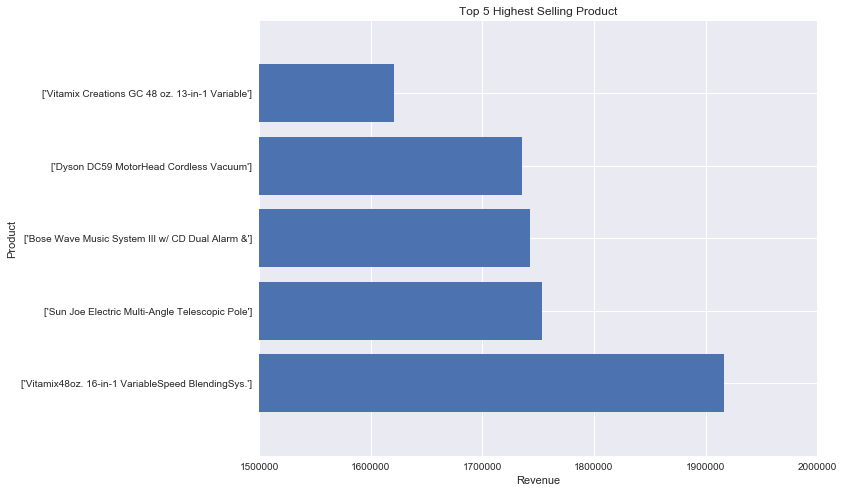

In [40]:
y_label = []
for i in range(5):    
    item =  df['PRODUCT_DESCRIPTION'][df.PRODUCT_NBR == dft.index[i]].unique()
    y_label.append(item)
   
y = [1,2,3,4,5]

x = dft.iloc[:,0:].values.tolist()
x = sum(x,[])
x = x[0:5]

plt.figure(figsize=(10,8))

plt.axis([1500000,2000000,0,6])

plt.yticks(y, y_label)

plt.title('Top 5 Highest Selling Product')
plt.ylabel('Product')
plt.xlabel('Revenue')
plt.barh(y,x, align='center')
plt.show()